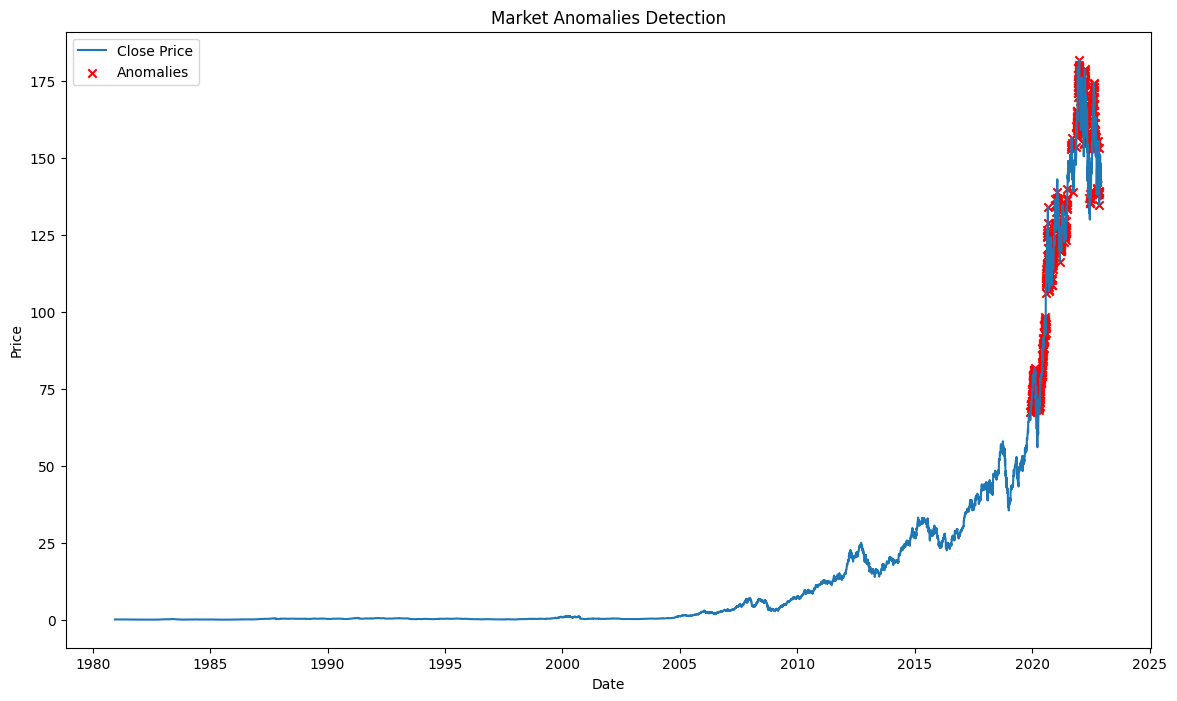

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


def load_data(file_path):
    data = pd.read_csv(file_path)
    data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    return data

def preprocess_data(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

def detect_anomalies(data, contamination=0.05):
    model = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    model.fit(data)
    return model.predict(data)

def plot_anomalies(data, predictions):
    anomalies = data[predictions == -1]
    plt.figure(figsize=(14, 8))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.scatter(anomalies.index, anomalies['Close'], color='red', label='Anomalies', marker='x')
    plt.title('Market Anomalies Detection')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Main function
if __name__ == "__main__":
    file_path = '/content/AAPL.csv'
    data = load_data(file_path)

    features = data[['Close']]

    scaled_data = preprocess_data(features)

    predictions = detect_anomalies(scaled_data)

    data['Anomaly'] = predictions

    plot_anomalies(data, predictions)